In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/phishing_site_urls.csv')
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
      # prompt: replace 'bad' as 0 and 'good' as 1 in Label

df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})
print(df.head())


                                                 URL  Label
0  nobell.it/70ffb52d079109dca5664cce6f317373782/...      0
1  www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...      0
2  serviciosbys.com/paypal.cgi.bin.get-into.herf....      0
3  mail.printakid.com/www.online.americanexpress....      0
4  thewhiskeydregs.com/wp-content/themes/widescre...      0


/tmp/ipython-input-2438928534.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})


In [ ]:
# prompt: train this df with xg boost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Assuming df is already loaded as in the previous code

# Data preprocessing
df = df.sample(frac=1).reset_index(drop=True)
# Drop rows with NaN values in 'Label' column
df.dropna(subset=['Label'], inplace=True)
# Convert 'Label' column to integers to ensure they aren't floats
df['Label'] = df['Label'].astype(int)
y = df['Label']
url_list = df['URL']

# Feature Engineering using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(url_list)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:09:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9148807067789617


In [ ]:
from sklearn.metrics import precision_score, recall_score, log_loss

# Calculate and print loss, accuracy, precision, and recall
loss = log_loss(y_test, model.predict_proba(X_test))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Loss: 0.2334635584289656
Accuracy: 0.9148807067789617
Precision: 0.9118789127506142
Recall: 0.9753513366898914


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score


test_url = ['mail.printakid.com/www.online.americanexpress.com/index.html']
test_vector = vectorizer.transform(test_url)
prediction = model.predict(test_vector)

print(f"Prediction : {prediction}")

if prediction[0] == 1:
    print("it is predicted as a legitimate website.")
else:
    print("it is predicted as a phishing website.")


Prediction : [0]
it is predicted as a phishing website.


In [ ]:
df=pd.read_csv('/content/phishing_site_urls.csv')
df.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for smaller datasets

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
loss_lr = log_loss(y_test, lr_model.predict_proba(X_test))
print('test_size=0.1')
print(f"Logistic Regression Model Performance:")
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

test_size=0.1
Logistic Regression Model Performance:
Loss: 0.2334635584289656
Accuracy: 0.9148807067789617
Precision: 0.9118789127506142
Recall: 0.9753513366898914


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
loss_rf = log_loss(y_test, rf_model.predict_proba(X_test))

print(f"Random Forest Loss: {loss_rf}")
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")


KeyboardInterrupt: 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss

# Initialize the SVM model
# Due to the large dataset, we'll use a linear SVM which is more scalable
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Train the model
# Training an SVM on a large dataset can be time-consuming
print("Training SVM model...")
svm_model.fit(X_train, y_train)
print("SVM model training complete.")

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
loss_svm = log_loss(y_test, svm_model.predict_proba(X_test))


print(f"SVM Model Performance:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"Loss: {loss_svm}")

Training SVM model...


In [ ]:
# Install LightGBM if not already installed
# !pip install lightgbm



# Load dataset
df = pd.read_csv('/content/phishing_site_urls.csv')

# Replace labels: 'bad' -> 0, 'good' -> 1
df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})

# Shuffle and clean
df = df.sample(frac=1).reset_index(drop=True)
df.dropna(subset=['Label'], inplace=True)
df['Label'] = df['Label'].astype(int)

# Features and target
y = df['Label']
url_list = df['URL']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(url_list)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Classifier
model = lgb.LGBMClassifier(
    n_estimators=300,
    max_depth=-1,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
loss = log_loss(y_test, y_prob)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Save model & vectorizer for later use



/tmp/ipython-input-2966496491.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})


[LightGBM] [Info] Number of positive: 314484, number of negative: 124992
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 88.762738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196323
[LightGBM] [Info] Number of data points in the train set: 439476, number of used features: 11646
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.715589 -> initscore=0.922683
[LightGBM] [Info] Start training from score 0.922683


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Loss: 0.1638335759596366
Accuracy: 0.9396650587057431
Precision: 0.9380589275910449
Recall: 0.9802141764405915

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     31430
           1       0.94      0.98      0.96     78440

    accuracy                           0.94    109870
   macro avg       0.94      0.91      0.92    109870
weighted avg       0.94      0.94      0.94    109870



In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
# Install CatBoost if not installed
# !pip install catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, classification_report
from catboost import CatBoostClassifier

import pickle

# Load dataset
df = pd.read_csv('/content/phishing_site_urls.csv')

# Replace labels: 'bad' -> 0, 'good' -> 1
df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})

# Shuffle and clean
df = df.sample(frac=1).reset_index(drop=True)
df.dropna(subset=['Label'], inplace=True)
df['Label'] = df['Label'].astype(int)

# Features and target
y = df['Label']
url_list = df['URL']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(url_list)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# CatBoost Classifier
model = CatBoostClassifier(
    iterations=300,
    depth=6,
    learning_rate=0.1,
    eval_metric='Logloss',
    random_seed=42,
    verbose=50
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
loss = log_loss(y_test, y_prob)



print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



/tmp/ipython-input-2635224600.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})


0:	learn: 0.6362983	total: 2.6s	remaining: 12m 56s
50:	learn: 0.3396240	total: 1m 52s	remaining: 9m 10s
100:	learn: 0.2969885	total: 3m 40s	remaining: 7m 14s
150:	learn: 0.2709064	total: 5m 29s	remaining: 5m 25s
200:	learn: 0.2505111	total: 7m 15s	remaining: 3m 34s
250:	learn: 0.2371751	total: 9m	remaining: 1m 45s
299:	learn: 0.2264178	total: 10m 46s	remaining: 0us
Loss: 0.2275455810120937
Accuracy: 0.919431567194971
Precision: 0.9144540908624108
Recall: 0.9792821068126253

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.84     46597
           1       0.91      0.98      0.95    118207

    accuracy                           0.92    164804
   macro avg       0.93      0.87      0.89    164804
weighted avg       0.92      0.92      0.92    164804



/tmp/ipython-input-3145597896.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})


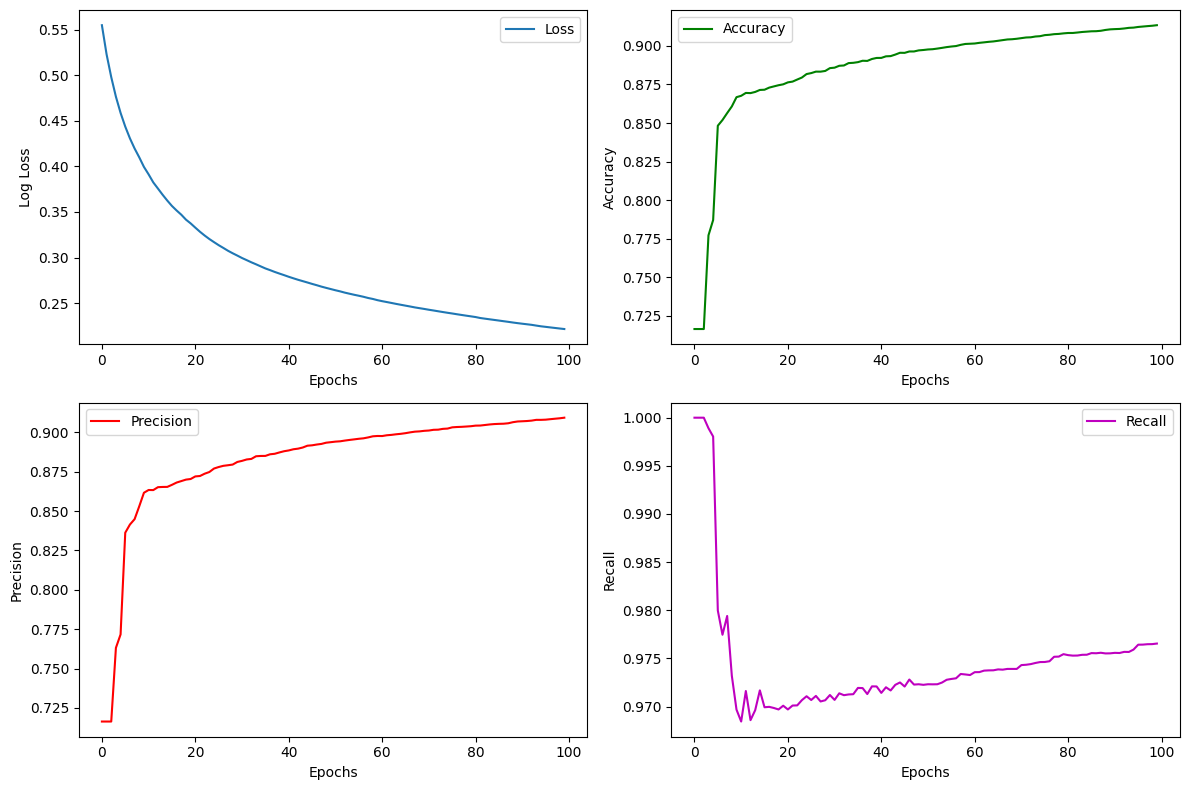

In [ ]:
# Install LightGBM if not installed
# !pip install lightgbm

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss
import lightgbm as lgb
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/phishing_site_urls.csv')

# Replace labels: 'bad' -> 0, 'good' -> 1
df['Label'] = df['Label'].replace({'bad': 0, 'good': 1})

# Shuffle and clean
df = df.sample(frac=1).reset_index(drop=True)
df.dropna(subset=['Label'], inplace=True)
df['Label'] = df['Label'].astype(int)

# Features and target
y = df['Label']
url_list = df['URL']

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(url_list)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Convert to LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Store metrics
epochs = 100
metrics = {"loss": [], "accuracy": [], "precision": [], "recall": []}

# Train LightGBM with custom evaluation
model = lgb.train(
    {
        "objective": "binary",
        "metric": "binary_logloss",
        "learning_rate": 0.1,
        "verbose": -1,
    },
    train_data,
    valid_sets=[valid_data],
    num_boost_round=epochs,
    callbacks=[
        lgb.record_evaluation({}),
    ],
)

# Manually calculate metrics per epoch
y_pred_proba_all = []
for i in range(1, epochs + 1):
    y_prob = model.predict(X_test, num_iteration=i)
    y_pred = (y_prob > 0.5).astype(int)

    metrics["loss"].append(log_loss(y_test, y_prob))
    metrics["accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["precision"].append(precision_score(y_test, y_pred))
    metrics["recall"].append(recall_score(y_test, y_pred))

# --- Plotting ---
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(metrics["loss"], label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(metrics["accuracy"], label="Accuracy", color="g")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(metrics["precision"], label="Precision", color="r")
plt.xlabel("Epochs")
plt.ylabel("Precision")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(metrics["recall"], label="Recall", color="m")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()

plt.tight_layout()
plt.show()
